In [74]:
!pip install matplotlib
!pip install scikit-learn

In [75]:
# CARICO e IMPORTO LIBRERIE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import graphviz

In [76]:
# CARICAMENTO DEL DATASET (da excel)
dataframe = pd.read_excel("dataset_breast.xlsx")

In [77]:
# CONTROLLO DEI DATI
print(dataframe.head())
print(dataframe.describe(include='all'))  # Analisi preliminare
print(dataframe.isnull().sum())  # Verifica valori mancanti

       age  menopause tumor-size inv-nodes node-caps deg-malig   breast  \
0  '40-49'  'premeno'    '15-19'     '0-2'     'yes'       '3'  'right'   
1  '50-59'     'ge40'    '15-19'     '0-2'      'no'       '1'  'right'   
2  '50-59'     'ge40'    '35-39'     '0-2'      'no'       '2'   'left'   
3  '40-49'  'premeno'    '35-39'     '0-2'     'yes'       '3'  'right'   
4  '40-49'  'premeno'    '30-34'     '3-5'     'yes'       '2'   'left'   

  breast-quad irradiat                   Class  
0   'left_up'     'no'     'recurrence-events'  
1   'central'     'no'  'no-recurrence-events'  
2  'left_low'     'no'     'recurrence-events'  
3  'left_low'    'yes'  'no-recurrence-events'  
4  'right_up'     'no'     'recurrence-events'  
            age  menopause tumor-size inv-nodes node-caps deg-malig  breast  \
count       286        286        286       286       286       286     286   
unique        6          3         11         7         3         3       2   
top     '50-59'  '

In [78]:
# RIMOZIONE DEI DUPLICATI
dataframe_senza_duplicati = dataframe.drop_duplicates()
print(dataframe_senza_duplicati)

         age  menopause tumor-size inv-nodes node-caps deg-malig   breast  \
0    '40-49'  'premeno'    '15-19'     '0-2'     'yes'       '3'  'right'   
1    '50-59'     'ge40'    '15-19'     '0-2'      'no'       '1'  'right'   
2    '50-59'     'ge40'    '35-39'     '0-2'      'no'       '2'   'left'   
3    '40-49'  'premeno'    '35-39'     '0-2'     'yes'       '3'  'right'   
4    '40-49'  'premeno'    '30-34'     '3-5'     'yes'       '2'   'left'   
..       ...        ...        ...       ...       ...       ...      ...   
281  '50-59'     'ge40'    '30-34'     '6-8'     'yes'       '2'   'left'   
282  '50-59'  'premeno'    '25-29'     '3-5'     'yes'       '2'   'left'   
283  '30-39'  'premeno'    '30-34'     '6-8'     'yes'       '2'  'right'   
284  '50-59'  'premeno'    '15-19'     '0-2'      'no'       '2'  'right'   
285  '50-59'     'ge40'    '40-44'     '0-2'      'no'       '3'   'left'   

    breast-quad irradiat                   Class  
0     'left_up'     'no'

In [79]:
# Definizione di features e  labels
X = dataframe_senza_duplicati.drop(columns=['Class'], axis=1)  # Features
y = dataframe_senza_duplicati['Class']  # Label

In [80]:
# PRE-ELABORAZIONE
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Identificazione delle colonne categoriche
categorical_features = X.select_dtypes(include=['object']).columns

# Applicazione di LabelEncoder a ogni colonna categorica
for col in categorical_features:
    X[col] = encoder.fit_transform(X[col])

# Applico encoder anche su y
y = encoder.fit_transform(y)

# Verifica del risultato
print(X)

     age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      2          2           2          0          1          2       1   
1      3          0           2          0          0          0       1   
2      3          0           6          0          0          1       0   
3      2          2           6          0          1          2       1   
4      2          2           5          4          1          1       0   
..   ...        ...         ...        ...        ...        ...     ...   
281    3          0           5          5          1          1       0   
282    3          2           4          4          1          1       0   
283    1          2           5          5          1          1       1   
284    3          2           2          0          0          1       1   
285    3          0           7          0          0          2       0   

     breast-quad  irradiat  
0              2         0  
1              0         0  


In [81]:
# Suddivisione dei dati in training e test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DECISION TREE BASE: CRITERIO ENTROPY, PROFONDITÀ MAX=5
modello = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Training del modello
modello.fit(X_train, Y_train)

# Predizione sul set di test
Y_pred = modello.predict(X_test)

# Verifica dei risultati
print("Predizioni:", Y_pred[:5])

# Calcolo dell'accuratezza
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuratezza del modello: {accuracy:.4f}")

Predizioni: [1 0 0 1 0]
Accuratezza del modello: 0.6909


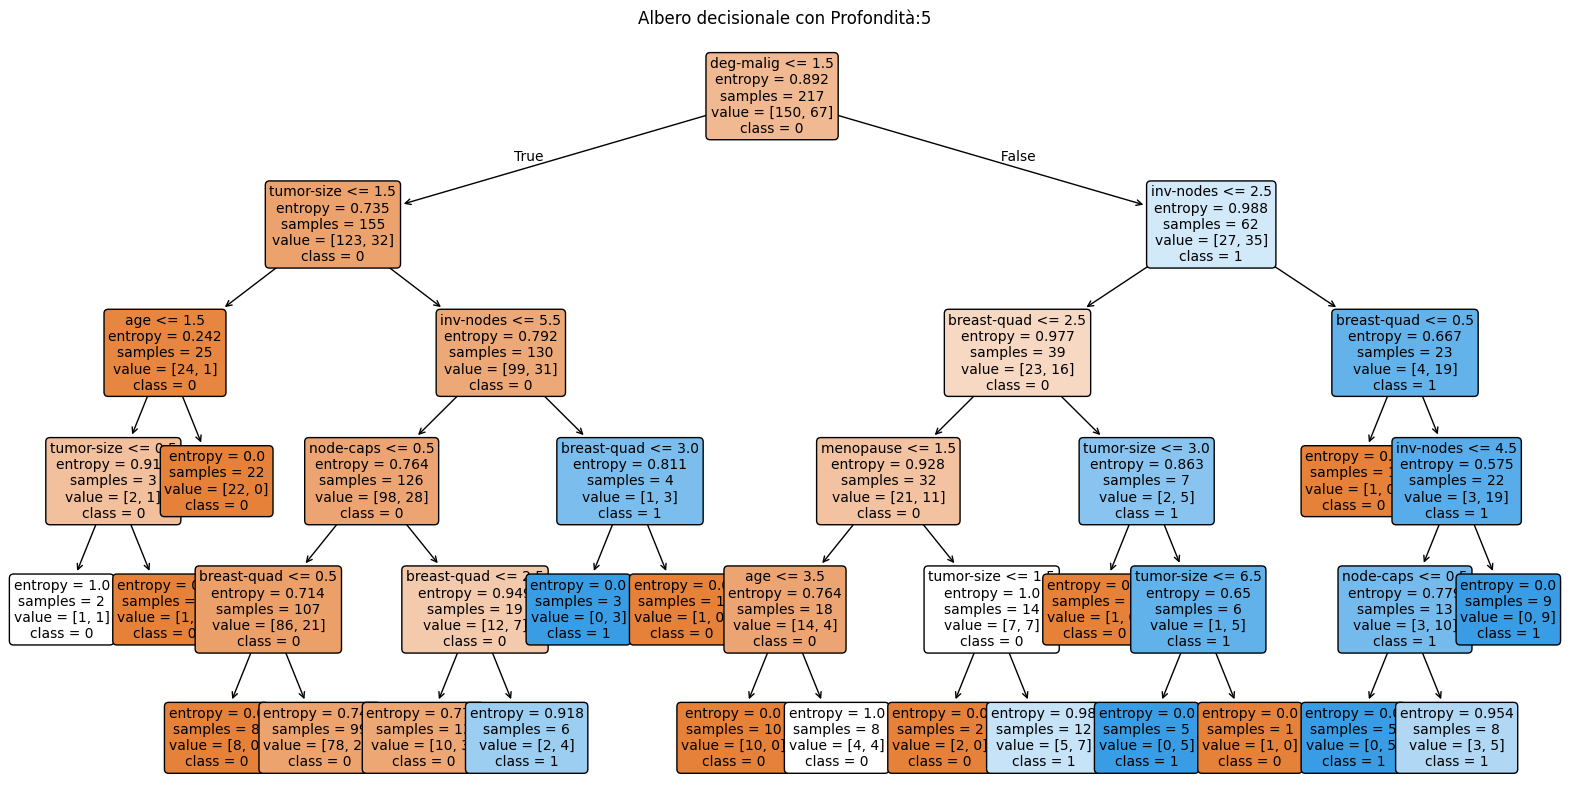

Attributo più discriminante: deg-malig


In [82]:
# Imposta la figura per migliorare la leggibilità
plt.figure(figsize=(20, 10))

# VISUALIZZO ALBERO DECISIONALE
plot_tree(modello,
          feature_names=X.columns,  # Nomi delle features
          class_names=[str(c) for c in modello.classes_], # Nomi delle classi
          filled=True,              # Colorazione basata sulla classe
          rounded=True,             # Bordi arrotondati per maggiore leggibilità
          fontsize=10)              # Dimensione del testo

plt.title(f"Albero decisionale con Profondità:{str(modello.get_depth())}")
plt.show()

# Attributo più discriminante
importances = pd.Series(modello.feature_importances_, index=X.columns)
print("Attributo più discriminante:", importances.idxmax())



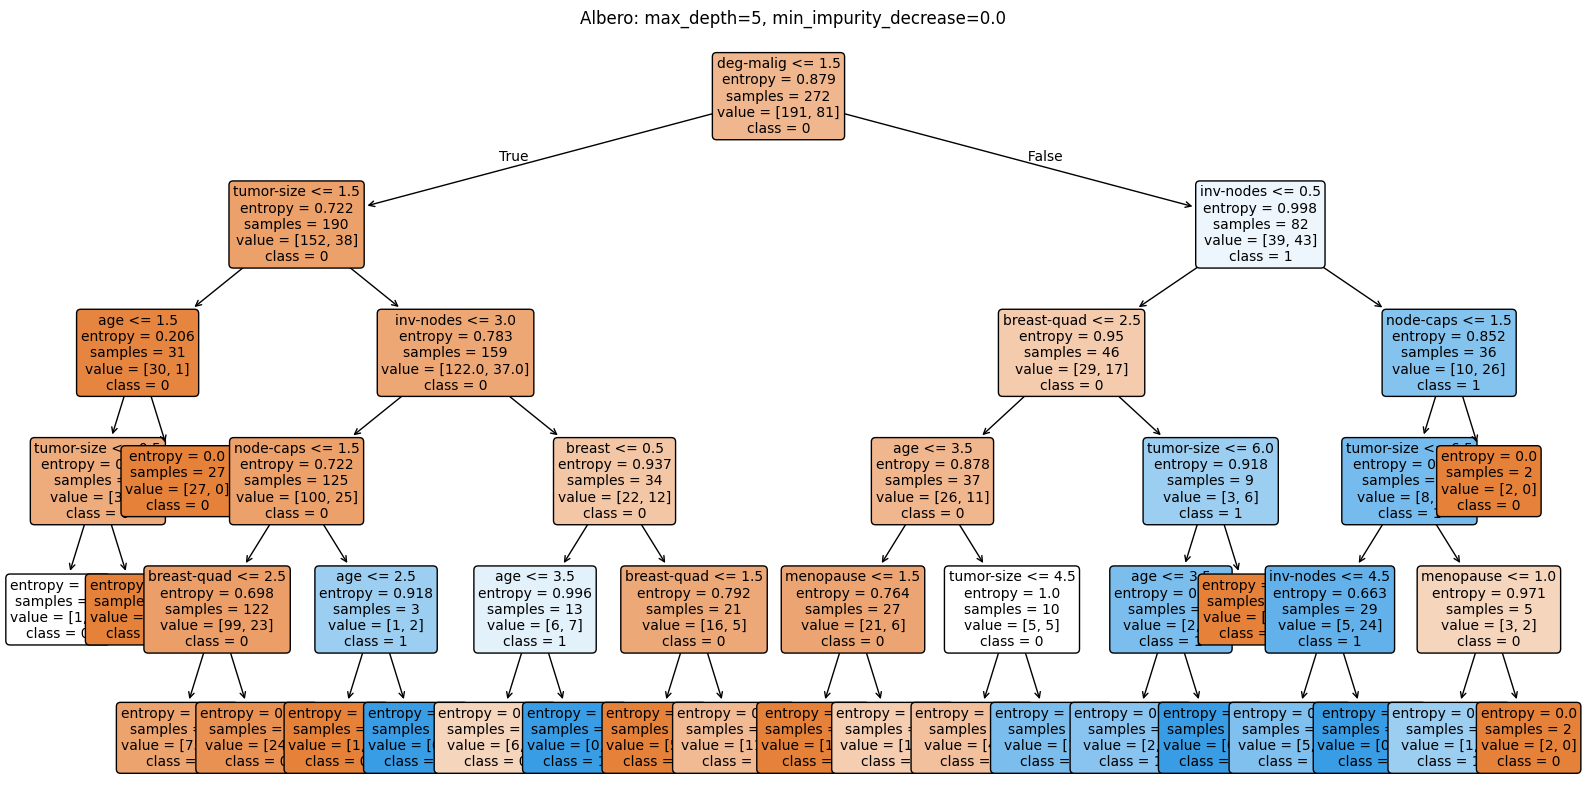

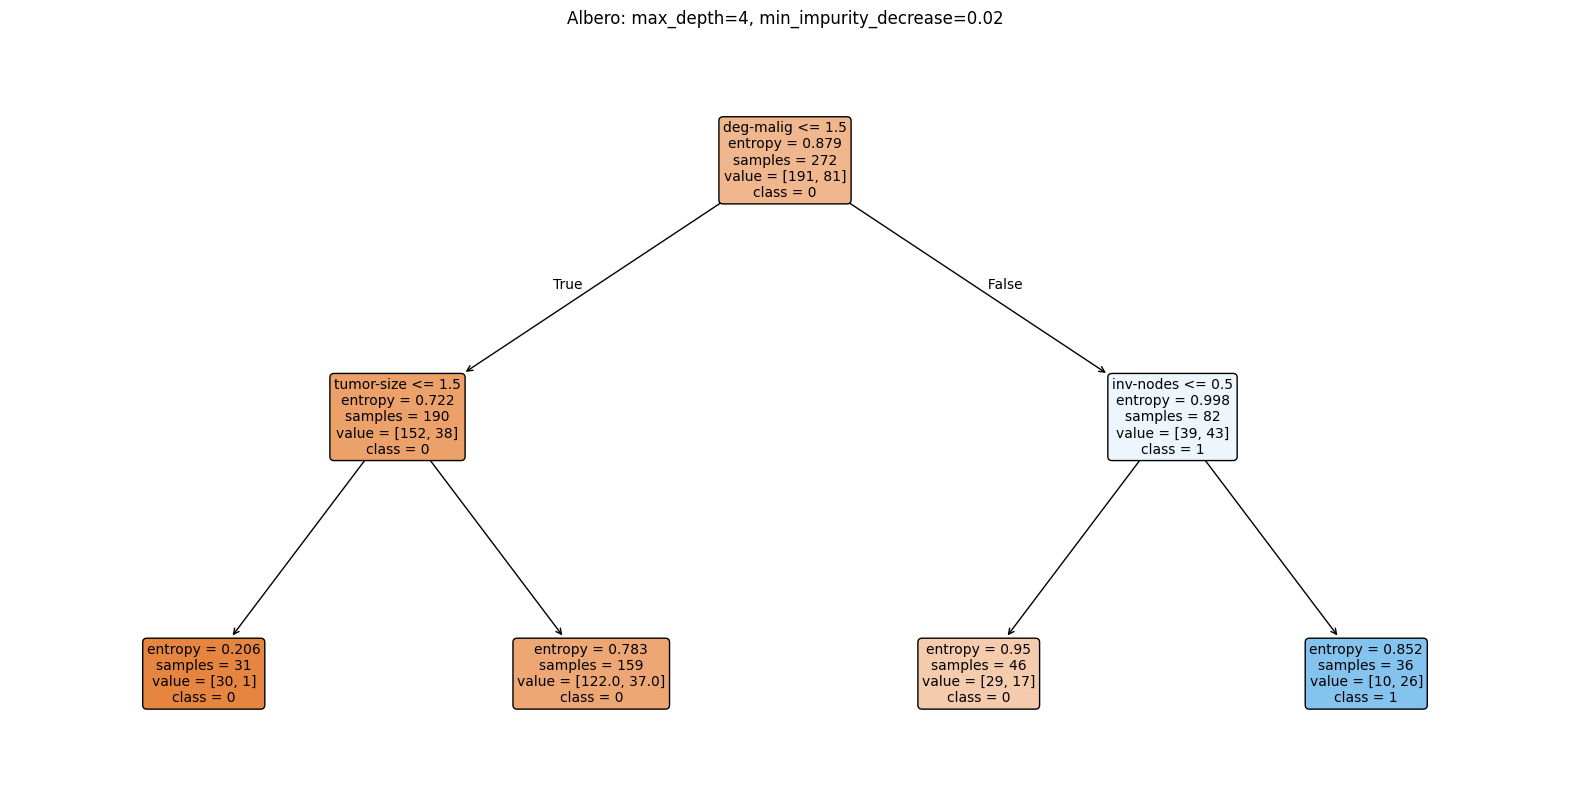

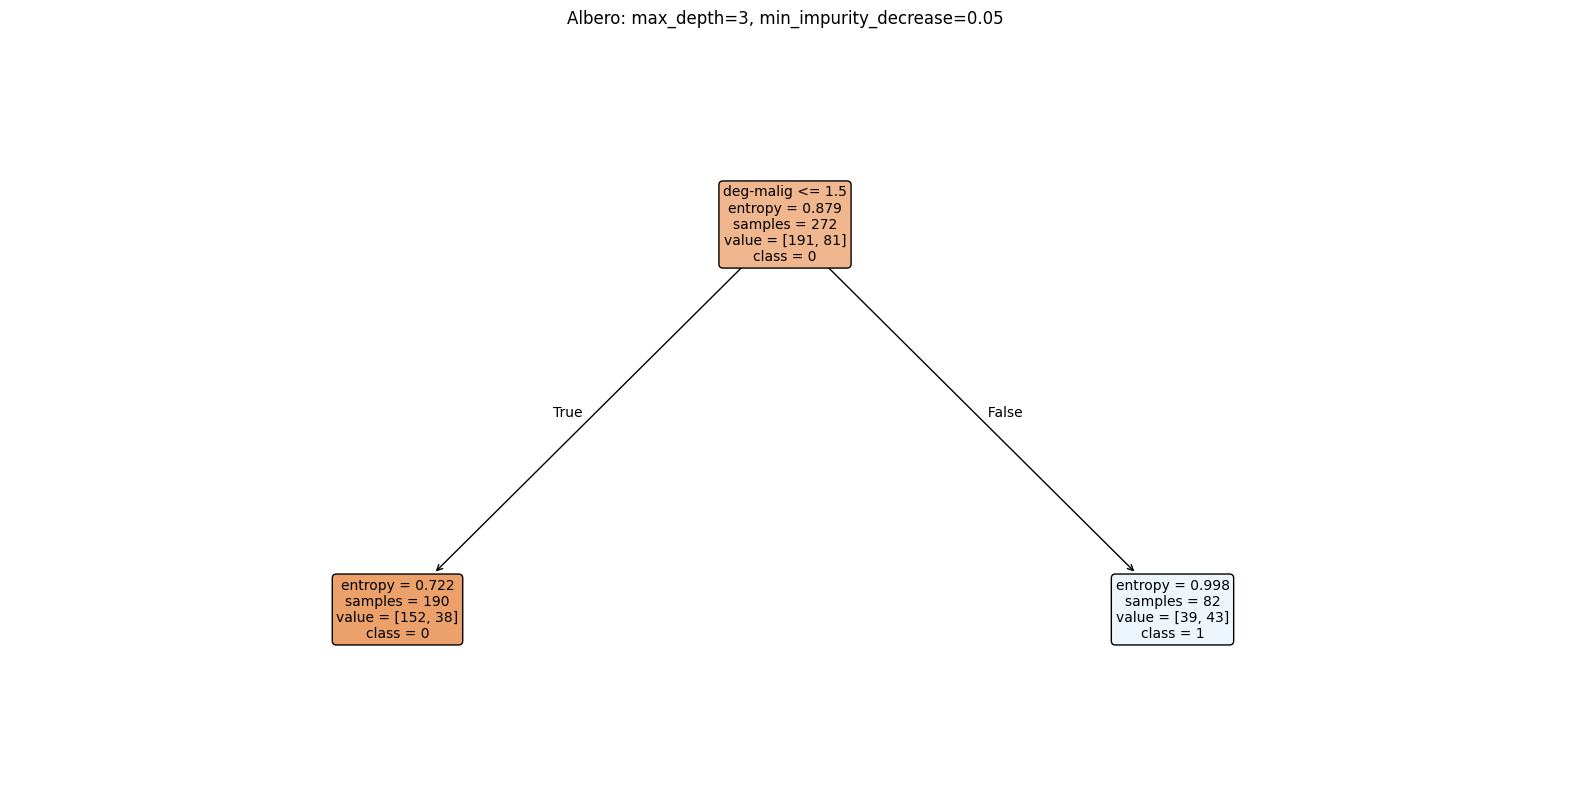

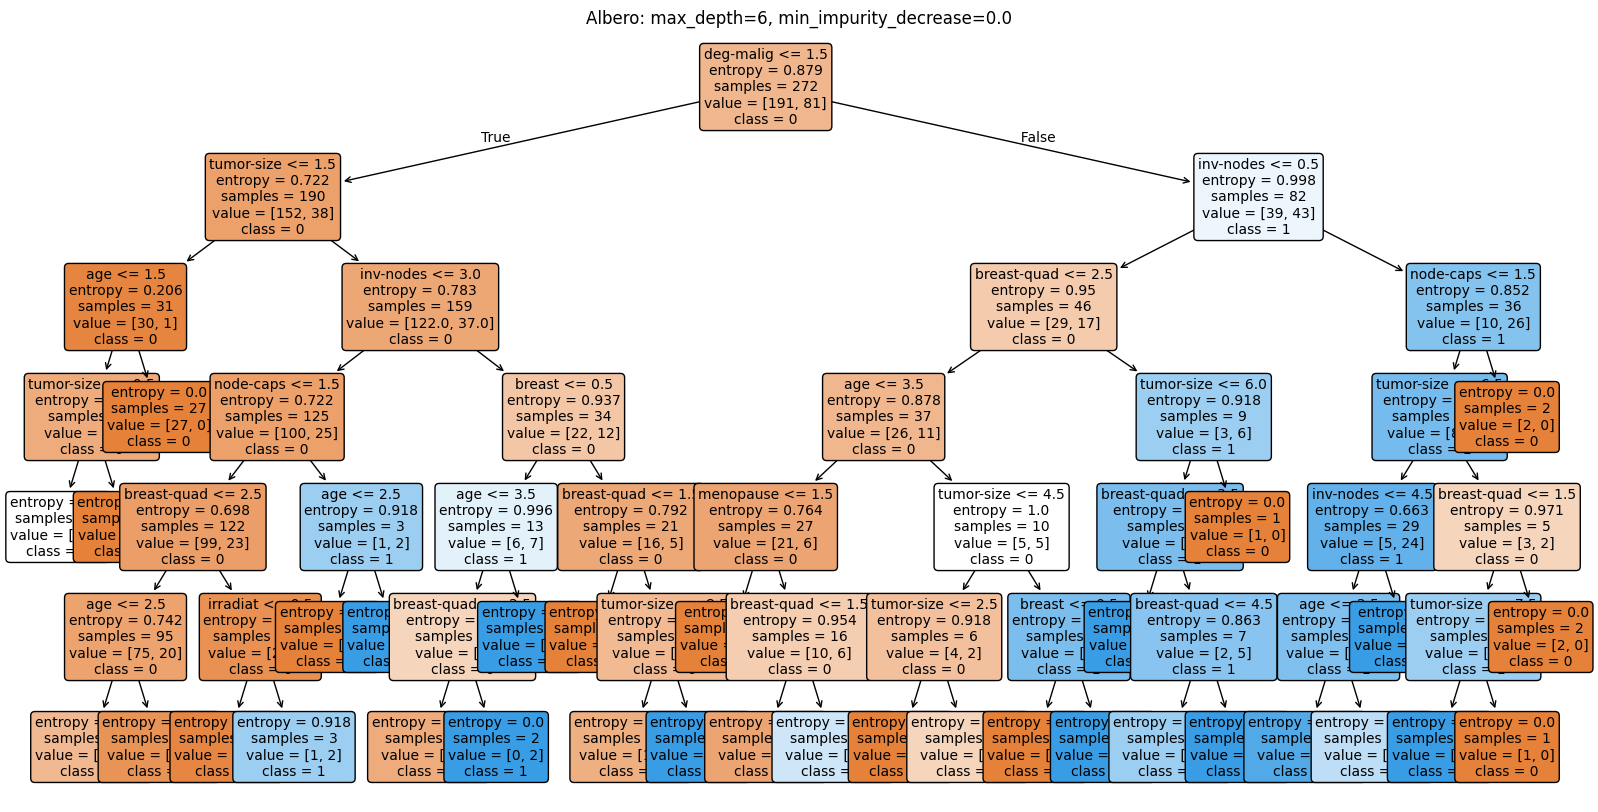

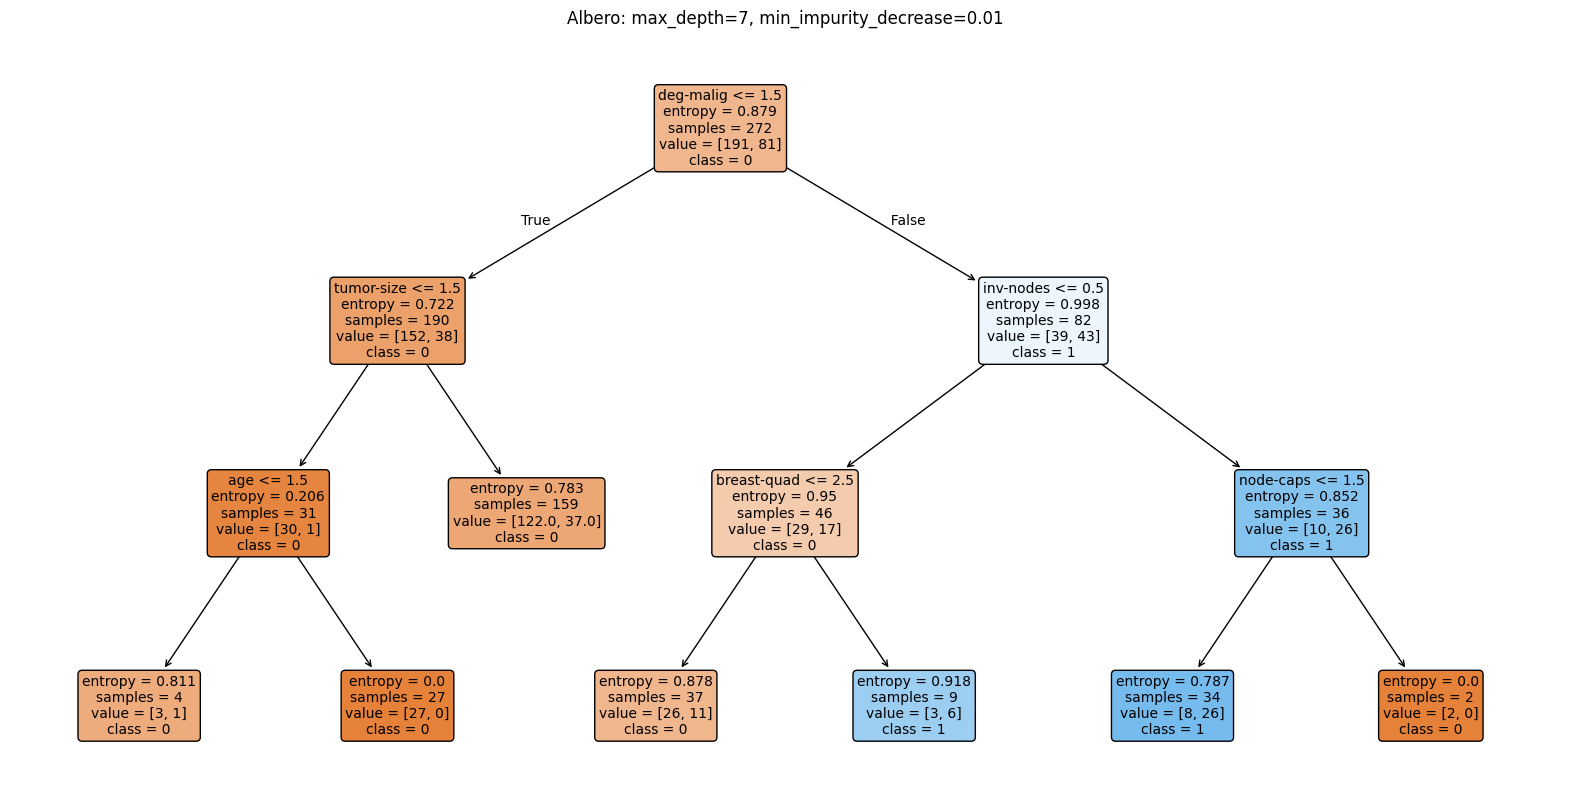

In [83]:
# Iterazione su parametri (analisi dei parametri su decision teee)
params = [(5, 0.0), (4, 0.02), (3, 0.05), (6, 0.0), (7, 0.01)]
for max_depth, min_impurity_decrease in params:
    modello = DecisionTreeClassifier(criterion='entropy',
                                         max_depth=max_depth,
                                         min_impurity_decrease=min_impurity_decrease,
                                         random_state=42)
    modello.fit(X, y)

    plt.figure(figsize=(20, 10))
    plot_tree(modello, feature_names=X.columns,
              class_names=[str(c) for c in modello.classes_],
              filled=True, rounded=True, fontsize=10)
    plt.title(f"Albero: max_depth={max_depth}, min_impurity_decrease={min_impurity_decrease}")
    plt.show()


Configurazione 1: max_depth=5, min_impurity_decrease=0.0
Accuratezza: 0.6949
Matrice di confusione:
[[163  28]
 [ 55  26]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       191
           1       0.48      0.32      0.39        81

    accuracy                           0.69       272
   macro avg       0.61      0.59      0.59       272
weighted avg       0.67      0.69      0.67       272



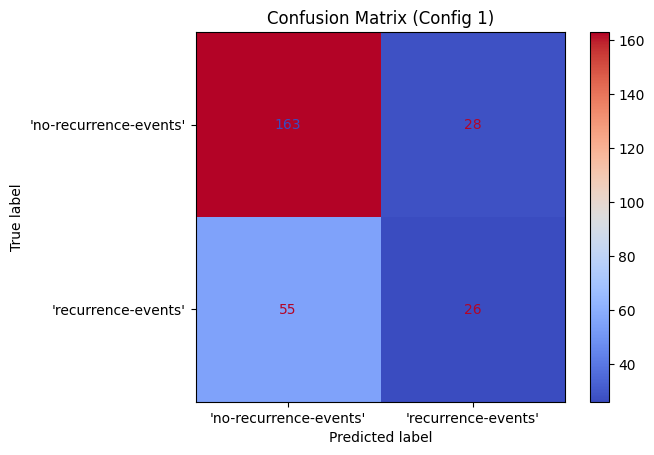

Configurazione 2: max_depth=4, min_impurity_decrease=0.02
Accuratezza: 0.7206
Matrice di confusione:
[[173  18]
 [ 58  23]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       191
           1       0.56      0.28      0.38        81

    accuracy                           0.72       272
   macro avg       0.65      0.59      0.60       272
weighted avg       0.69      0.72      0.69       272



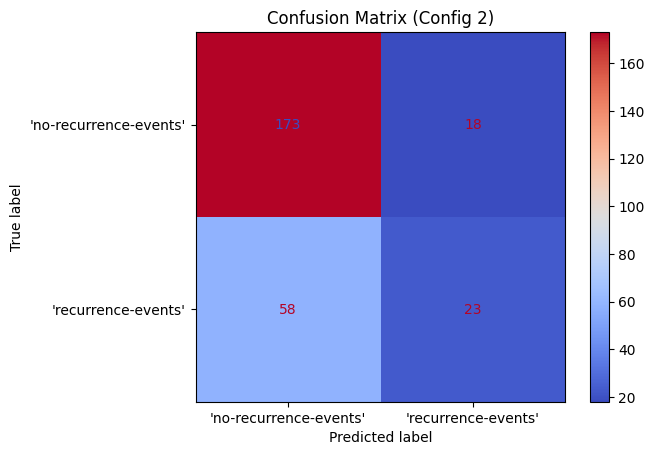

Configurazione 3: max_depth=3, min_impurity_decrease=0.05
Accuratezza: 0.6985
Matrice di confusione:
[[151  40]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       191
           1       0.49      0.48      0.49        81

    accuracy                           0.70       272
   macro avg       0.64      0.64      0.64       272
weighted avg       0.70      0.70      0.70       272



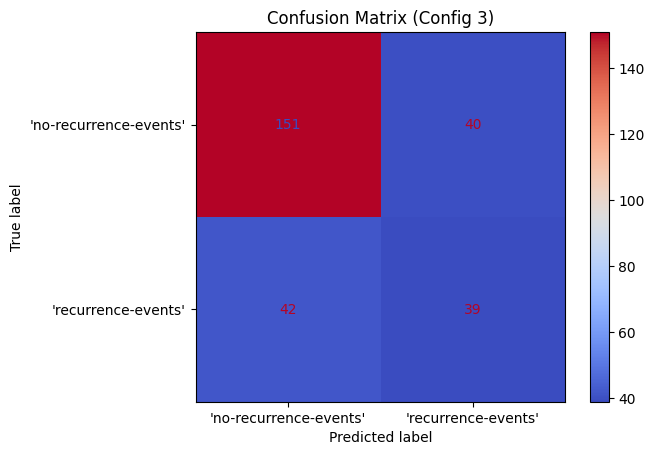

Configurazione 4: max_depth=6, min_impurity_decrease=0.0
Accuratezza: 0.6838
Matrice di confusione:
[[161  30]
 [ 56  25]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       191
           1       0.45      0.31      0.37        81

    accuracy                           0.68       272
   macro avg       0.60      0.58      0.58       272
weighted avg       0.66      0.68      0.66       272



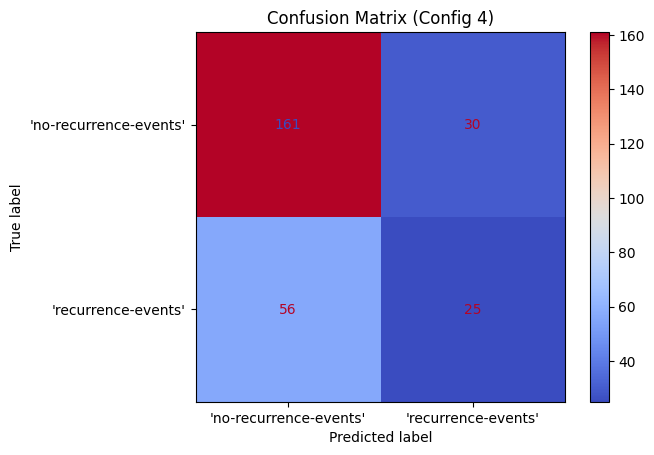

Configurazione 5: max_depth=7, min_impurity_decrease=0.01
Accuratezza: 0.6949
Matrice di confusione:
[[171  20]
 [ 63  18]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       191
           1       0.47      0.22      0.30        81

    accuracy                           0.69       272
   macro avg       0.60      0.56      0.55       272
weighted avg       0.65      0.69      0.66       272



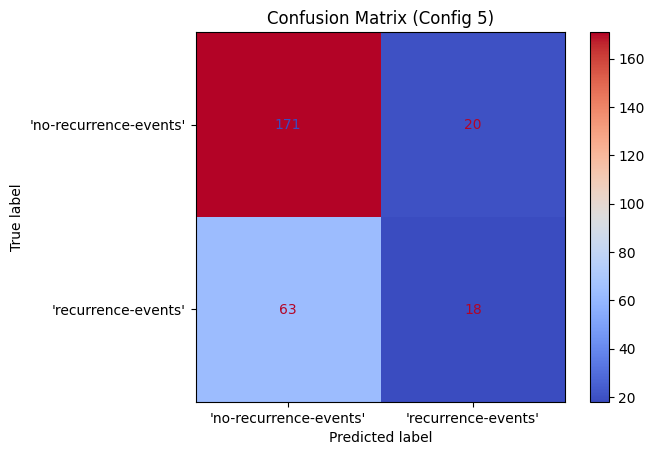

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt

# Configurazioni dei parametri (fornite)
params = [
    (5, 0.0),  # max_depth=5, min_impurity_decrease=0.0
    (4, 0.02), # max_depth=4, min_impurity_decrease=0.02
    (3, 0.05), # max_depth=3, min_impurity_decrease=0.05
    (6, 0.0),  # max_depth=6, min_impurity_decrease=0.0
    (7, 0.01)  # max_depth=7, min_impurity_decrease=0.01
]

# Valutazione con Stratified 10-fold CV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Iterazione su ogni configurazione
for i, (max_depth, min_impurity_decrease) in enumerate(params):
    # Configurazione del modello
    model = DecisionTreeClassifier(
        criterion='entropy',
        max_depth=max_depth,
        min_impurity_decrease=min_impurity_decrease,
        random_state=42
    )

    # Cross-validation con predizioni
    y_pred = cross_val_predict(model, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)

    # Stampa dei risultati
    print(f"Configurazione {i+1}: max_depth={max_depth}, min_impurity_decrease={min_impurity_decrease}")
    print(f"Accuratezza: {accuracy:.4f}")
    print(f"Matrice di confusione:\n{cm}")
    print(classification_report(y, y_pred))

    # Visualizzazione della matrice di confusione
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.inverse_transform([0, 1]))
    disp.plot(cmap='coolwarm')
    plt.title(f"Confusion Matrix (Config {i+1})")
    plt.show()


Analisi K-NN variando K:

K=1
Accuratezza media: 0.6397
Matrice di confusione:
[[142  49]
 [ 49  32]]


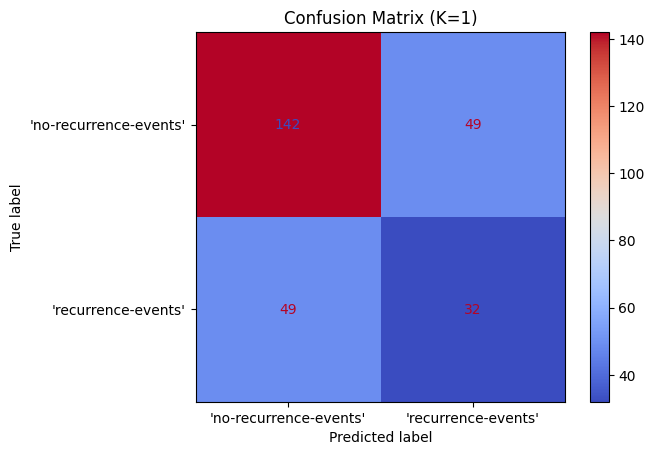

K=3
Accuratezza media: 0.6985
Matrice di confusione:
[[162  29]
 [ 53  28]]


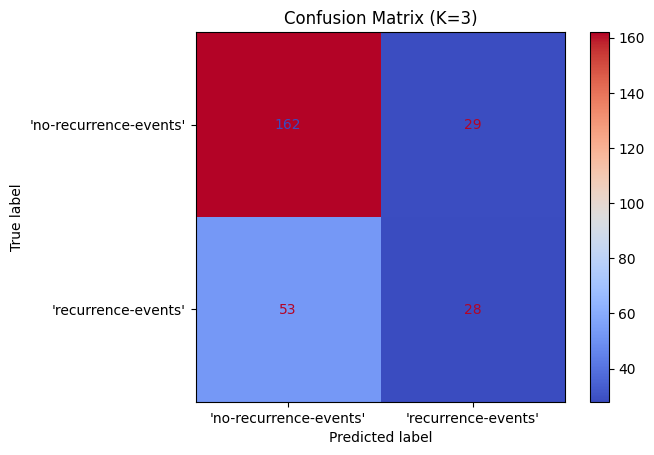

K=5
Accuratezza media: 0.6949
Matrice di confusione:
[[166  25]
 [ 58  23]]


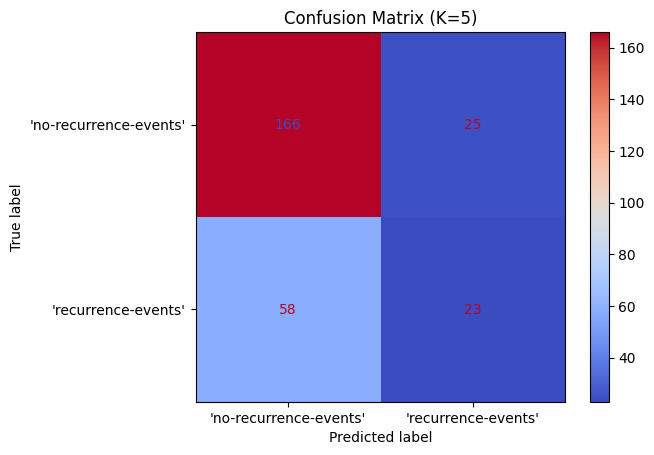

K=7
Accuratezza media: 0.6912
Matrice di confusione:
[[173  18]
 [ 66  15]]


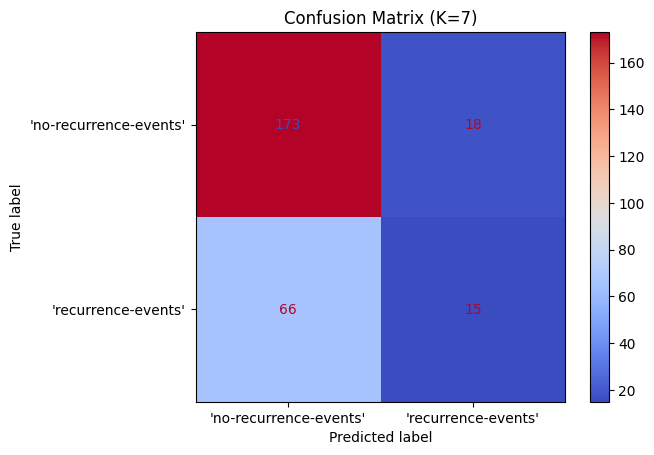

K=9
Accuratezza media: 0.7059
Matrice di confusione:
[[174  17]
 [ 63  18]]


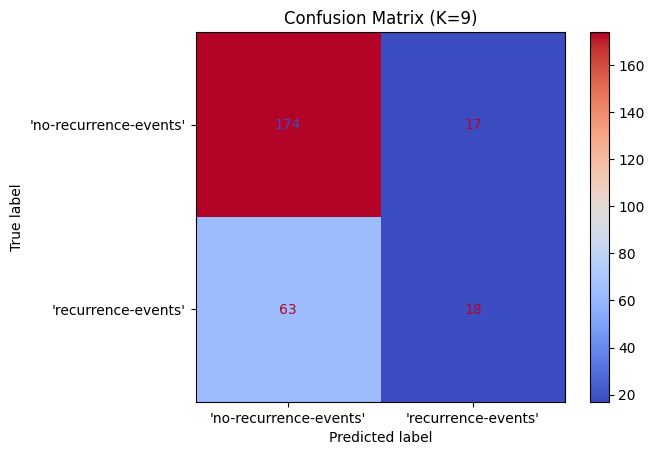

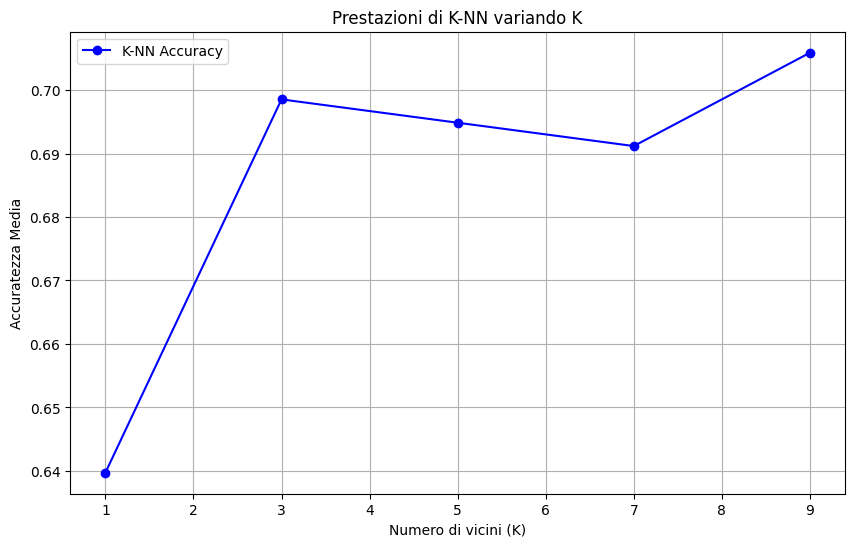


Analisi Naïve Bayes:

Naïve Bayes Classifier
Accuratezza media: 0.7353
Matrice di confusione:
[[158  33]
 [ 39  42]]


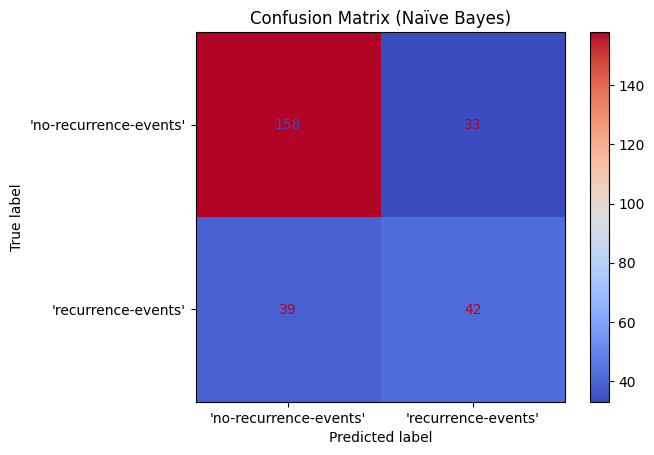


Confronto delle prestazioni:
Accuratezza media migliore di K-NN: 0.7059
Accuratezza media di Naïve Bayes: 0.7353
Naïve Bayes si comporta meglio di K-NN.


In [85]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Analisi K-NN variando il numero di vicini (K)
k_values = [1, 3, 5, 7, 9]  # Valori di K da analizzare
accuracies_knn = []
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Analisi K-NN variando K:\n")
for k in k_values:
    # Configurazione del classificatore K-NN
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Cross-validation stratificata con predizioni
    y_pred_knn = cross_val_predict(knn_model, X, y, cv=cv)

    # Matrice di confusione
    cm_knn = confusion_matrix(y, y_pred_knn)
    accuracy_knn = accuracy_score(y, y_pred_knn)
    accuracies_knn.append(accuracy_knn)

    # Stampa dei risultati
    print(f"K={k}")
    print(f"Accuratezza media: {accuracy_knn:.4f}")
    print(f"Matrice di confusione:\n{cm_knn}")

    # Visualizzazione della matrice di confusione
    disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=encoder.inverse_transform([0, 1]))
    disp_knn.plot(cmap='coolwarm')
    plt.title(f"Confusion Matrix (K={k})")
    plt.show()

# Grafico delle accuratezze per i diversi valori di K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_knn, marker='o', color='blue', label="K-NN Accuracy")
plt.xlabel('Numero di vicini (K)')
plt.ylabel('Accuratezza Media')
plt.title('Prestazioni di K-NN variando K')
plt.grid()
plt.legend()
plt.show()

# Analisi Naïve Bayes
print("\nAnalisi Naïve Bayes:\n")
nb_model = GaussianNB()

# Cross-validation stratificata con predizioni
y_pred_nb = cross_val_predict(nb_model, X, y, cv=cv)
cm_nb = confusion_matrix(y, y_pred_nb)
accuracy_nb = accuracy_score(y, y_pred_nb)

# Stampa dei risultati
print("Naïve Bayes Classifier")
print(f"Accuratezza media: {accuracy_nb:.4f}")
print(f"Matrice di confusione:\n{cm_nb}")

# Visualizzazione della matrice di confusione per Naïve Bayes
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=encoder.inverse_transform([0, 1]))
disp_nb.plot(cmap='coolwarm')
plt.title("Confusion Matrix (Naïve Bayes)")
plt.show()

# Confronto delle prestazioni
print("\nConfronto delle prestazioni:")
print(f"Accuratezza media migliore di K-NN: {max(accuracies_knn):.4f}")
print(f"Accuratezza media di Naïve Bayes: {accuracy_nb:.4f}")

if max(accuracies_knn) > accuracy_nb:
    print("K-NN si comporta meglio di Naïve Bayes.")
else:
    print("Naïve Bayes si comporta meglio di K-NN.")


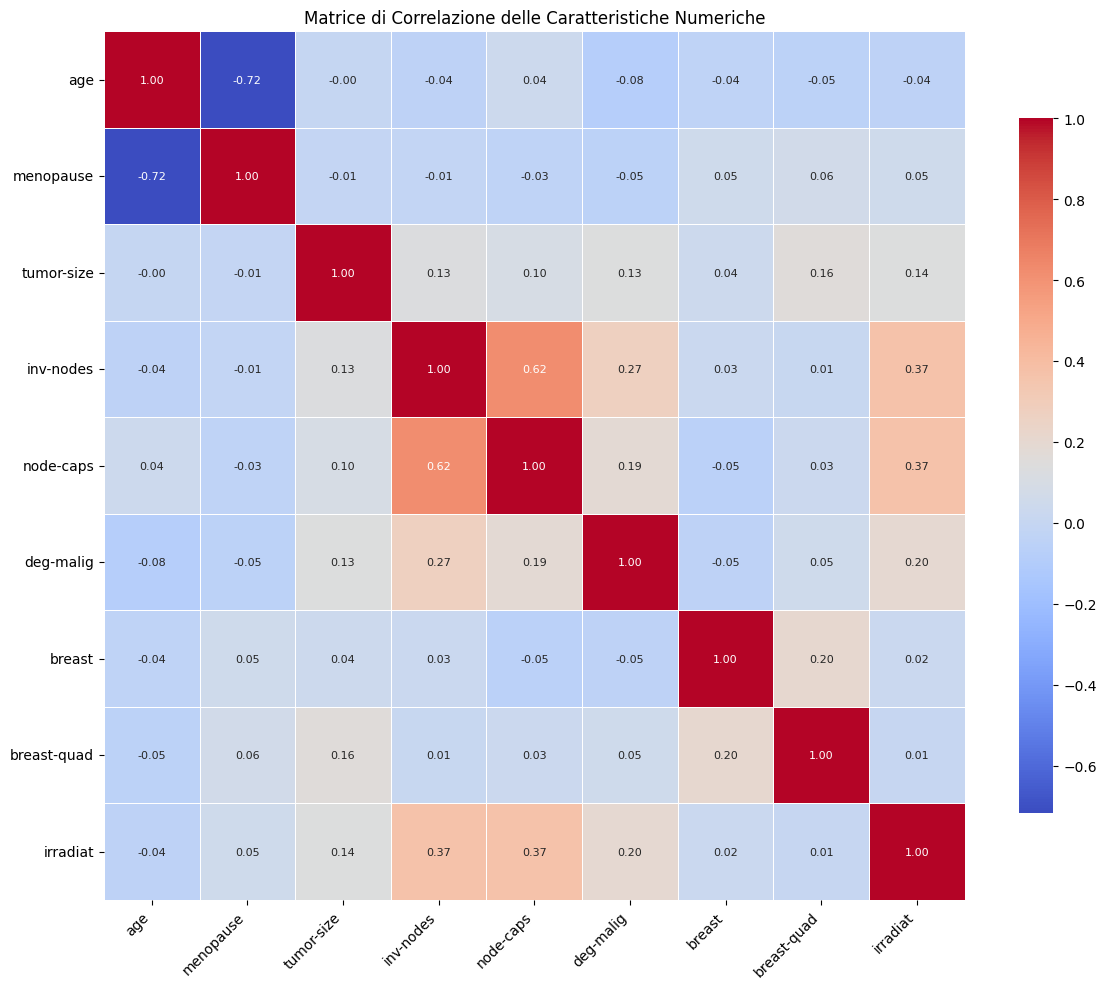

Coppia più correlata: inv-nodes  node-caps    0.61996
dtype: float64


In [86]:
# MATRICE DI CORRELAZIONE
correlation_matrix = X.corr()

# Visualizzazione della matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={"size": 8})
plt.title("Matrice di Correlazione delle Caratteristiche Numeriche")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Aggiustamento per evitare il sovraffollamento delle etichette
plt.show()

# Individuare la coppia più correlata (escludendo la correlazione con se stessa)
correlated_pair = correlation_matrix.unstack().sort_values(ascending=False)
# Filtra le correlazioni che non sono tra una variabile e se stessa (1.0)
correlated_pair = correlated_pair[correlated_pair < 1.0]
# Mostra la coppia più correlata
print("Coppia più correlata:", correlated_pair.head(1))
